## **SETUP**
Installing and importing Tensorflow, matplotlib

In [ ]:
!pip install --upgrade pip setuptools

In [ ]:
!pip install tensorflow-gpu==2.9.0

ERROR: Operation cancelled by user


In [ ]:
!pip install opencv-python matplotlib

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohappyeyeballs                 2.3.4
aiohttp                          3.10.1
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.13
albumentations                   1.4.13
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.8.5.0.32.23
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread               

In [4]:
import tensorflow as tf


In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')


[]

## **CLEANING DATA**


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
filePath = '/content/drive/MyDrive/skindoctor'
os.listdir(filePath)
os.path.exists(filePath)

True

In [8]:
import cv2
import imghdr

In [9]:
dataDir = os.path.join(filePath, 'data')
dataDir
melanoma = os.path.join(dataDir, 'melanoma')


In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
os.path.exists(dataDir)

True

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
os.listdir(dataDir)

['acne', 'melanoma', 'healthy skin']

In [ ]:
for image_class in os.listdir(dataDir):
    for image in os.listdir(os.path.join(dataDir, image_class)):

        image_path = os.path.join(dataDir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            print(e)
            # os.remove(image_path)

KeyboardInterrupt: 

# **Loading Data**

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory(dataDir)

Found 300 files belonging to 3 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch  = data_iterator.next()
# Acne (0), Healthy Skin (1), Melanoma (2)
# Caution when running this multiple times


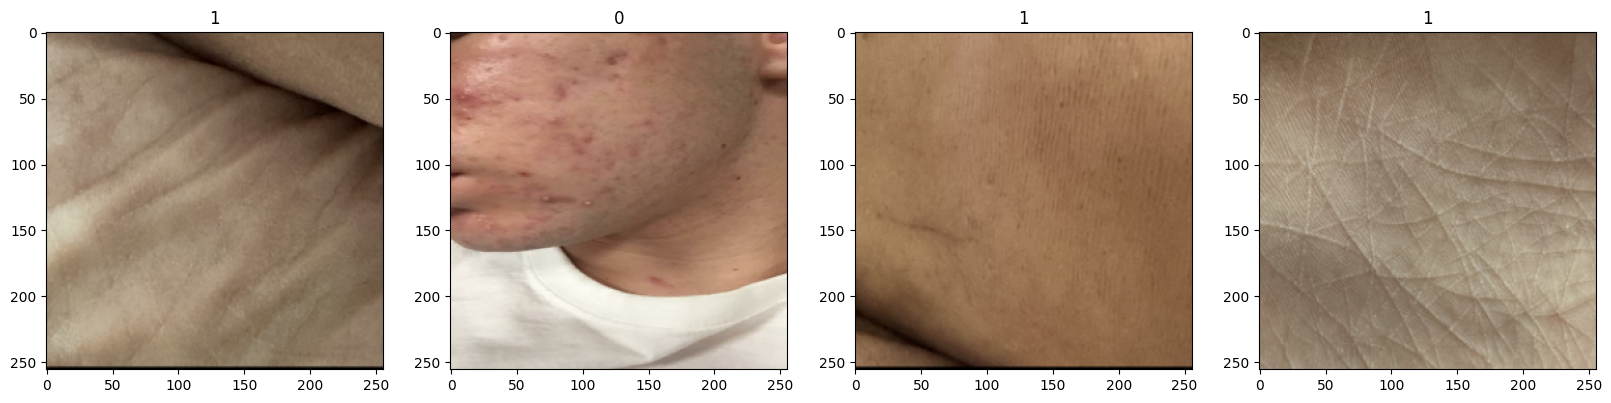

In [13]:
# Preview
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Scale Data**

In [20]:
data = data.map(lambda x,y: (x/255, y))


In [21]:
data.as_numpy_iterator().next()


(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [22]:
len(data)

10

# **Split Data**

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train_size


7

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [25]:
len(train)
#len(val)
#len(test)


7

In [28]:
train


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
#final layer should match the number of classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# **Train**

In [30]:
logdir='logs'


In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [32]:
hist = model.fit(train, epochs=11, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3886 - loss: 2.4292 - val_accuracy: 0.3594 - val_loss: 1.1145
Epoch 2/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3477 - loss: 1.1062 - val_accuracy: 0.5156 - val_loss: 1.0137
Epoch 3/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5238 - loss: 0.9614 - val_accuracy: 0.5781 - val_loss: 0.8795
Epoch 4/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5939 - loss: 0.8187 - val_accuracy: 0.6250 - val_loss: 0.7328
Epoch 5/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6856 - loss: 0.6813 - val_accuracy: 0.6719 - val_loss: 0.8508
Epoch 6/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6812 - loss: 0.6623 - val_accuracy: 0.8125 - val_loss: 0.5396
Epoch 7/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7993 - loss: 0.5894 - val_accuracy: 0.8281 - val_loss: 0.4873
Epoch 8/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8396 - loss: 0.5116 - val_accuracy: 0.8906 - val_loss: 0.4024
Epoch 9/

# **Analysis**

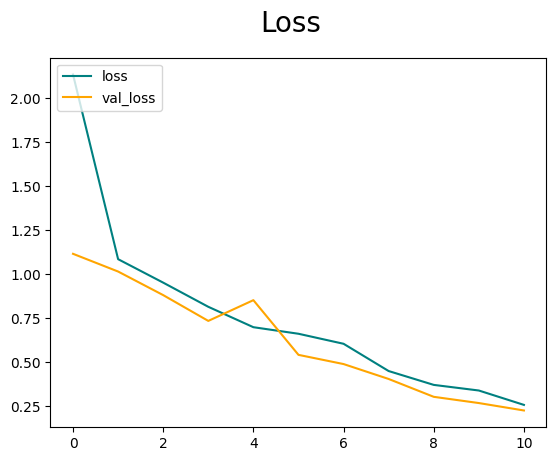

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Evaluate**

In [40]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [44]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [46]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)
    pre.update_state(y, tf.argmax(yhat, axis=1))  # Converting predictions to label format
    re.update_state(y, tf.argmax(yhat, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


In [48]:
print(pre.result(), re.result(), acc.result())
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
1.0 1.0 1.0


# **Testing**

In [49]:
import cv2
from google.colab import drive
drive.mount('/content/drive')

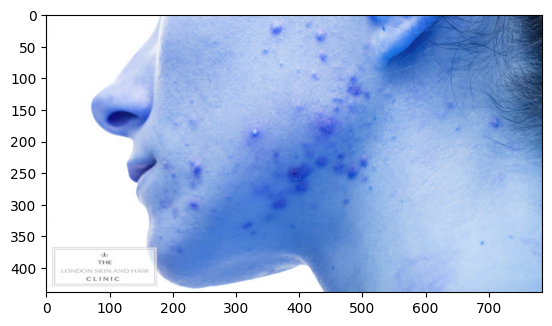

In [50]:
img = cv2.imread('acne_test.jpeg')
plt.imshow(img)
plt.show()

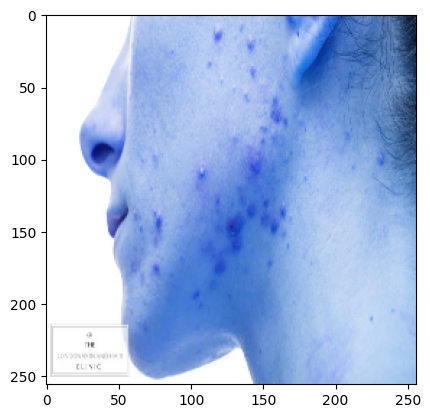

In [51]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


In [54]:
yhat[0]


array([1.0604586e-01, 4.3672801e-04, 8.9351743e-01], dtype=float32)

In [56]:
predicted_class = np.argmax(yhat, axis=1)
predicted_class

array([2])

# **Saving Model**

In [57]:
from tensorflow.keras.models import load_model
os.chdir('/content/drive/MyDrive/skindoctor')


In [58]:
model.save(os.path.join('models','skindoctor.keras'))


In [ ]:
#os.path.exists('models')
#os.listdir('models')
os.getcwd()
#does it reset every time you referesh page?( what determines the currentwroking dir)

'/content/drive/MyDrive/skindoctor'

In [ ]:
new_model = load_model('models/skindoctor.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))


NameError: name 'resize' is not defined